In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/beer_permits.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,ObjectId,Permit__,Status,Permit_Type,Permit_Sub_Type,Permit_Subtype_Description,Date_Entered,Date_Issued,Parcel,Business_Name,Business_Owner,Address,City,State,ZIP,Council_Dist,Census_Tract,Lon,Lat,geometry
0,1,21-27149,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Thu, 01 Apr 2021 05:00:00 GMT","Thu, 29 Jul 2021 05:00:00 GMT",10308006000,"LOLA NASHVILLE, LLC",None,4401 MURPHY RD,NASHVILLE,TN,37209.0,24,37013400,-86.839203,36.140724,POINT (-86.83920 36.14072)
1,2,21-27151,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,"Fri, 02 Apr 2021 05:00:00 GMT","Thu, 29 Jul 2021 05:00:00 GMT",07207029200,BITE A BIT THAI SUSHI,KEVIN SICHOUMPHONH,1402 MCGAVOCK PIKE,NASHVILLE,TN,37216.0,7,37011500,-86.723963,36.204799,POINT (-86.72396 36.20480)
2,3,21-27153,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Mon, 05 Apr 2021 05:00:00 GMT","Thu, 15 Sep 2022 05:00:00 GMT",13314008900,404 BAR & GRILL,Nancy McGrath,404 ELYSIAN FIELDS RD,NASHVILLE,TN,37211.0,26,37018901,-86.731159,36.086771,POINT (-86.73116 36.08677)
3,4,21-27157,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Fri, 09 Apr 2021 05:00:00 GMT","Thu, 10 Jun 2021 05:00:00 GMT",093130C80100CO,SUNDA NEW ASIAN,None,592 12TH AVE S,NASHVILLE,TN,37203.0,19,37019500,-86.784013,36.151893,POINT (-86.78401 36.15189)
4,5,21-27171,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,"Wed, 14 Apr 2021 05:00:00 GMT","Thu, 13 Jan 2022 06:00:00 GMT",09109003200,TEE LINE CURLING & BOWLING CENTER,None,106 DULUTH AVE,NASHVILLE,TN,37209.0,20,37013202,-86.867446,36.157813,POINT (-86.86745 36.15781)


In [3]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ObjectId                    2032 non-null   int64   
 1   Permit__                    2032 non-null   object  
 2   Status                      2032 non-null   object  
 3   Permit_Type                 2032 non-null   object  
 4   Permit_Sub_Type             2032 non-null   object  
 5   Permit_Subtype_Description  2032 non-null   object  
 6   Date_Entered                2032 non-null   object  
 7   Date_Issued                 1980 non-null   object  
 8   Parcel                      2032 non-null   object  
 9   Business_Name               2031 non-null   object  
 10  Business_Owner              1037 non-null   object  
 11  Address                     2032 non-null   object  
 12  City                        2032 non-null   object  
 13  State     

In [4]:
zipcodes['ZIP'] = zipcodes['ZIP'].astype(str) 

In [5]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ObjectId                    2032 non-null   int64   
 1   Permit__                    2032 non-null   object  
 2   Status                      2032 non-null   object  
 3   Permit_Type                 2032 non-null   object  
 4   Permit_Sub_Type             2032 non-null   object  
 5   Permit_Subtype_Description  2032 non-null   object  
 6   Date_Entered                2032 non-null   object  
 7   Date_Issued                 1980 non-null   object  
 8   Parcel                      2032 non-null   object  
 9   Business_Name               2031 non-null   object  
 10  Business_Owner              1037 non-null   object  
 11  Address                     2032 non-null   object  
 12  City                        2032 non-null   object  
 13  State     

In [6]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

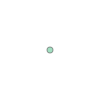

In [7]:
zipcodes.loc[0, 'geometry']

In [8]:
print(zipcodes.loc[0, 'geometry'])

POINT (-86.8392031 36.14072435)


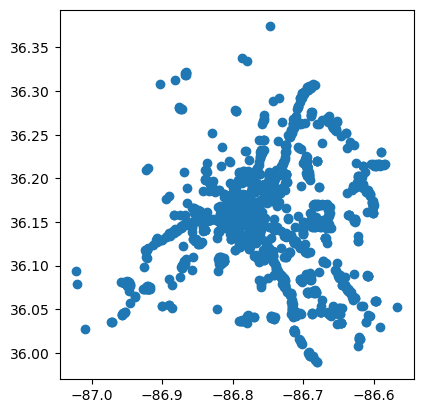

In [9]:
zipcodes.plot();

In [10]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [11]:
beer = pd.read_excel('../data/beer_clean.xlsx')

In [12]:
beer.to_csv('../data/beer_clean.csv',index= False)

In [13]:
beer.head()

,Business Name,Address,Lon,Lat,y,x,location
0,Betty's Grill,4900 CHARLOTTE AVE,-86.846094,36.152181,36.152181,-86.846094,"(36.1521814000001, -86.84609425)"
1,"Food Lion, LLC",936 Richards RD,-86.681502,36.068126,36.068126,-86.681502,"(36.0681261600001, -86.68150237)"
2,"Food Lion, LLC",3636 Bell RD,-86.627208,36.150747,36.150747,-86.627208,"(36.15074715, -86.6272076499999)"
3,Morton's of Chicago- The Steak,618 Church ST,-86.782434,36.162327,36.162327,-86.782434,"(36.16232704, -86.78243357)"
4,Chili's Grill & Bar,5005 Old Hickory BLVD,-86.620061,36.194951,36.194951,-86.620061,"(36.1949508100001, -86.62006139)"


In [14]:
beer = beer.drop(columns = ['x','y'])

In [15]:
zipcodes['ZIP'] = zipcodes['ZIP'].astype(str) 

In [16]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Business Name  2032 non-null   object 
 1   Address        2033 non-null   object 
 2   Lon            2033 non-null   float64
 3   Lat            2033 non-null   float64
 4   location       2033 non-null   object 
dtypes: float64(2), object(3)
memory usage: 79.5+ KB


In [17]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
beer_geo = gpd.GeoDataFrame(beer, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(beer.Lon, beer.Lat))

In [19]:
type(beer_geo)

geopandas.geodataframe.GeoDataFrame

In [20]:
zipcodes = zipcodes[['ZIP','City','geometry']]

In [21]:
beer_zip = gpd.sjoin(beer_geo,zipcodes, predicate = 'within')

In [22]:
beer_zip.head()

,Business Name,Address,Lon,Lat,location,geometry,index_right,ZIP,City
3,Morton's of Chicago- The Steak,618 Church ST,-86.782434,36.162327,"(36.16232704, -86.78243357)",POINT (-86.78243 36.16233),803,37219.0,Nashville
5,Rainforest Cafe,353 Opry Mills DR,-86.691645,36.200188,"(36.2001878, -86.69164456)",POINT (-86.69164 36.20019),805,37214.0,Nashville
10,Dalts Restaurant,4415 POST PL,-86.852231,36.129163,"(36.1291629, -86.85223138)",POINT (-86.85223 36.12916),809,37205.0,NASHVILLE
11,Wal-Mart Supercenter,7044 Charlotte PIKE,-86.907303,36.131483,"(36.13148276, -86.90730315)",POINT (-86.90730 36.13148),810,37209.0,Nashville
14,Little Barn Market,3039 Brick Church PIKE,-86.781341,36.231195,"(36.23119547, -86.78134098)",POINT (-86.78134 36.23120),812,37207.0,Nashville


In [29]:
beer_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 744 entries, 3 to 2032
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Business Name  744 non-null    object  
 1   Address        744 non-null    object  
 2   Lon            744 non-null    float64 
 3   Lat            744 non-null    float64 
 4   location       744 non-null    object  
 5   geometry       744 non-null    geometry
 6   index_right    744 non-null    int64   
 7   ZIP            744 non-null    object  
 8   City           744 non-null    object  
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 58.1+ KB


In [30]:
beer_zip['ZIP'].value_counts()

ZIP
37203.0    148
37214.0     96
37211.0     57
37206.0     49
37209.0     42
37201.0     34
37207.0     32
37013.0     32
37115.0     30
37221.0     25
37076.0     25
37217.0     24
37208.0     18
37210.0     18
37216.0     13
37204.0     12
37212.0     12
37219.0     11
37215.0     10
37027.0      9
37205.0      8
37138.0      8
37080.0      7
37213.0      6
37218.0      4
37228.0      4
37072.0      3
37220.0      2
37238.0      1
37189.0      1
37135.0      1
37067.0      1
nan          1
Name: count, dtype: int64

In [31]:
beer_37203 = beer_zip.loc[beer_zip['ZIP'] == '37203.0']
beer_37203.shape

(148, 9)

In [32]:
polygon37203 = zipcodes.loc[zipcodes['ZIP'] == '37203.0']

In [33]:
polygon37203.shape

(312, 3)

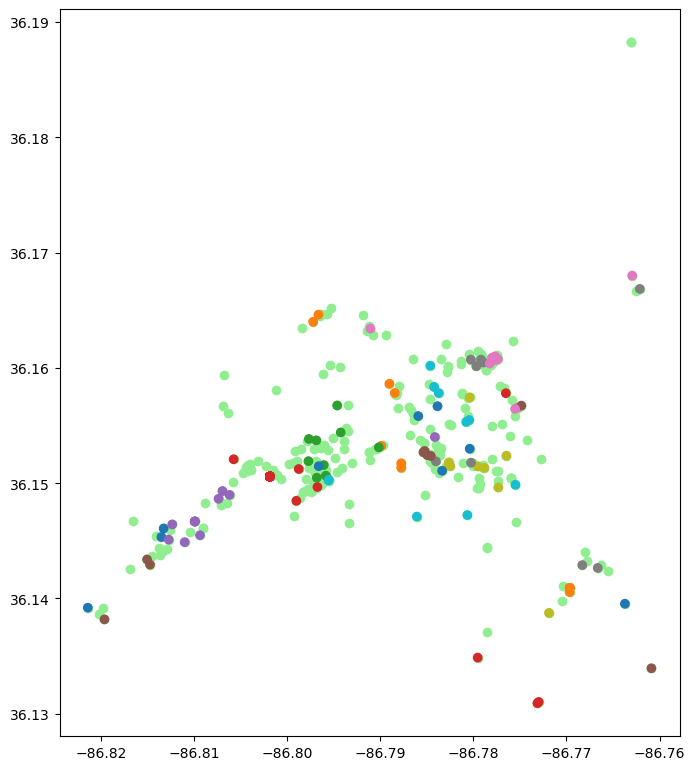

In [34]:
ax = polygon37203.plot(figsize = (8, 10), color = 'lightgreen')
beer_37203.plot( ax = ax, column = 'Address');
plt.show();

In [36]:
polygon37203.geometry.centroid

C:\Users\kevin\AppData\Local\Temp\ipykernel_24844\651956959.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37203.geometry.centroid


3       POINT (-86.78401 36.15189)
7       POINT (-86.78651 36.16075)
18      POINT (-86.77974 36.16041)
19      POINT (-86.78527 36.15346)
41      POINT (-86.79651 36.16454)
                   ...            
2015    POINT (-86.80427 36.15101)
2020    POINT (-86.79386 36.15367)
2025    POINT (-86.76087 36.13394)
2029    POINT (-86.79552 36.15029)
2031    POINT (-86.79582 36.15113)
Length: 312, dtype: geometry

In [38]:
center = polygon37203.geometry.centroid[41]
print(center)

POINT (-86.7965147199999 36.1645375000001)


C:\Users\kevin\AppData\Local\Temp\ipykernel_24844\1562499766.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37203.geometry.centroid[41]


In [39]:
area_center = [center.y, center.x]

In [40]:
print(area_center)

[36.1645375000001, -86.7965147199999]


In [41]:
map_37203 = folium.Map(location =  area_center, zoom_start = 12)
map_37203

In [43]:
i = 0
for row_index, row_values in beer_37203.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 50
values are:
 
Business Name                    FRIST ART MUSEUM
Address                          919  BROADWAY   
Lon                                    -86.783716
Lat                                     36.157813
location              (36.15781271, -86.78371595)
geometry         POINT (-86.78371595 36.15781271)
index_right                                   405
ZIP                                       37203.0
City                                    NASHVILLE
Name: 50, dtype: object
------------------------- 
index is 96
values are:
 
Business Name                         MAPCO #3420
Address                          1909  8TH AVE S 
Lon                                    -86.779531
Lat                                     36.134867
location              (36.13486721, -86.77953064)
geometry         POINT (-86.77953064 36.13486721)
index_right                                  1260
ZIP                                       37203.0
City                                    NASHVIL

In [47]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37203).add_to(map_37203)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in beer_37203.iterrows():
    loc = [row_values['Lat'], row_values['Lon']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="red",icon="beer", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37203)
map_37203.save('../maps/map37207.html')

#display our map
map_37203